<h1><center>PE3: Classifications Exercise</center></h1>

## Introduction:

Let's suppose you work for Google's advertisement team. Your team wants to figure out the best place to put the customized ads on a website for each customer so that the website can get more ad clicks. 

In this exercise, we will be working with a synthetic advertising dataset, indicating whether or not a particular Internet user clicked on an advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

This dataset contains the following features:

* `Daily Time Spent on Site`: consumer time on site in minutes
* `Age`: consumer age in years
* `Area Income`: Avg. Income of geographical area of consumer
* `Daily Internet Usage`: Avg. minutes a day consumer is on the Internet
* `Ad Topic Line`: Headline of the advertisement
* `City`: City of consumer
* `Male`: Whether or not consumer was male
* `Country`: Country of consumer
* `Timestamp`: Time at which consumer clicked on Ad or closed window

And the label:
* `Clicked on Ad`: 0 or 1 indicated clicking on Ad

## Section 1: Import Libraries and Load the Data

#### Import all the necessary libraries. We will hold on to the sklearn library and import it later when needed.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the `advertising.csv` file and set it to a DataFrame called `ad_data`.

In [73]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/advertising.csv'

In [74]:
ad_data = pd.read_csv(url)


#### Display the top 5 records.

In [75]:
ad_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Checkout the column information

In [76]:
ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### Find the basic statistics of the DataFrame.

In [77]:
ad_data.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Section 2: Exploratory Data Analysis

Let's use Seaborn to explore the data! Try recreating the plots shown below! Use the names of the x, y-axis as hints.


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

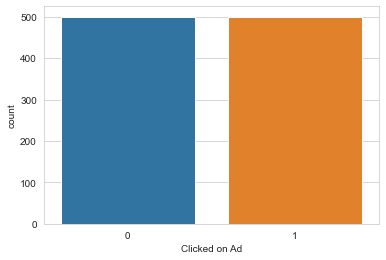

In [78]:
sns.set_style('whitegrid')
sns.countplot(data = ad_data, x = 'Clicked on Ad')




Check the missing data.

<AxesSubplot:>

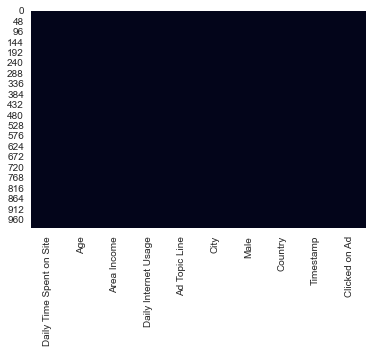

In [79]:
sns.heatmap(data = ad_data.isnull(), cbar=False)

#### Find the age distribution

<AxesSubplot:xlabel='Age', ylabel='Count'>

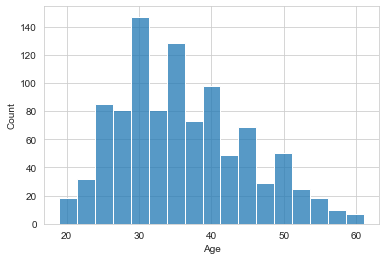

In [80]:

sns.histplot(ad_data['Age'])


#### Also find the relationship between `Daily Internet Usage` and `Daily Time Spent on Site`

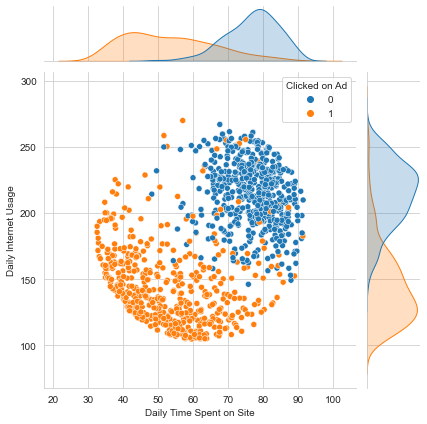

In [81]:
sns.jointplot(data = ad_data,
              x = 'Daily Time Spent on Site', 
              y = 'Daily Internet Usage', 
              hue = "Clicked on Ad")


#### Generate a pairplot for all numeric columns, and color-code with the label column.

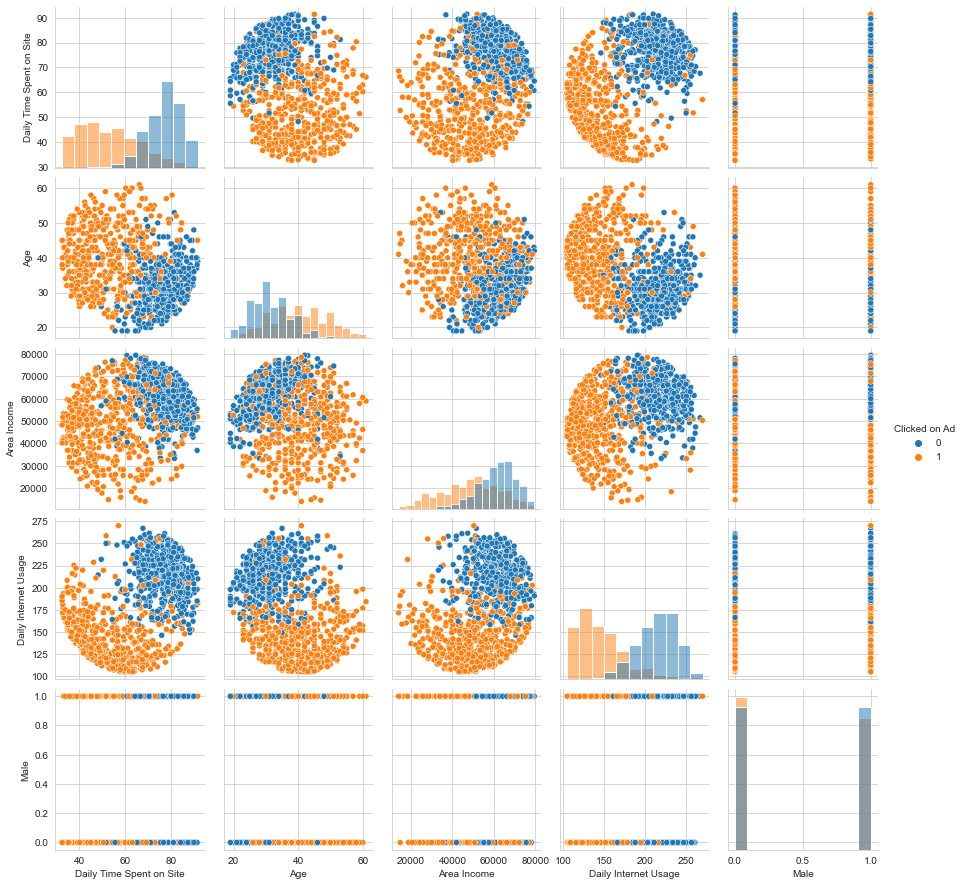

In [82]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', diag_kind ='hist')



#### Convert the `Timestamp` column from `str` type to `datatime` type,  then set it as the index to the DataFrame.

In [83]:
# Convert type from str to datetime

ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'], infer_datetime_format=True)


In [84]:
# Use the Timestamp column as the index
ad_data.set_index('Timestamp', inplace=True)



In [85]:
# Display the changes

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
Timestamp,,,,,,,,,
2016-03-27 00:53:11,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
2016-04-04 01:39:02,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2016-03-13 20:35:42,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
2016-01-10 02:31:19,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
2016-06-03 03:36:18,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0


#### Find the 14-day average `Daily Time Spent on Site` and plot it out using a bar chart.

<AxesSubplot:xlabel='Timestamp', ylabel='14 Day Average "Daily Time Spent on Site"'>

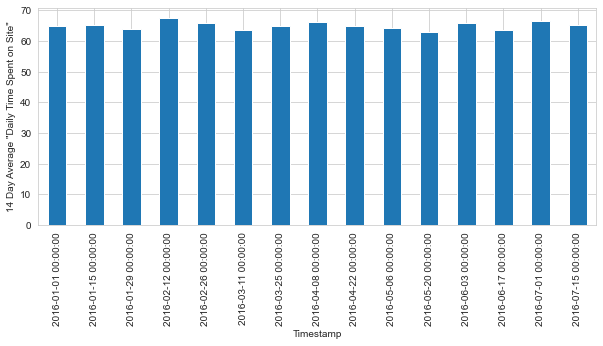

In [86]:
plt.figure(figsize = (10, 4))
plt.ylabel('14 Day Average "Daily Time Spent on Site"')
ad_data.resample('14D').mean()['Daily Time Spent on Site'].plot(kind= 'bar')



## Section 3: Model Training and Evaluation

Now it's time to do a train test split, and train our model!

I want to defer to your capability to choose the feature columns!

#### Find the feature matrix X and the label vector y.

In [87]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Clicked on Ad'],
      dtype='object')

In [88]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]


y = ad_data['Clicked on Ad']



#### Standardize the feature matrix X.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X = scaler.fit_transform(X)

#### Split the data into training set and testing set. Use training size of 70% and random seed as 101.

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=101)



#### Use logistic regression for the classification task, then evaluate the effectiveness using classification report.

In [94]:
from sklearn.linear_model import LogisticRegression


In [95]:
logmodel = LogisticRegression()


logmodel.fit(X_train, y_train)


LogisticRegression()

In [96]:
predictions = logmodel.predict(X_test)



In [97]:
from sklearn.metrics import classification_report, mean_absolute_error

In [98]:
# Print classificaiton report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



#### Now try a different classifier - KNN. Try your best to come up with the best f-1 score.

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
MSE = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    MSE.append(mean_absolute_error(y_test, pred))
    










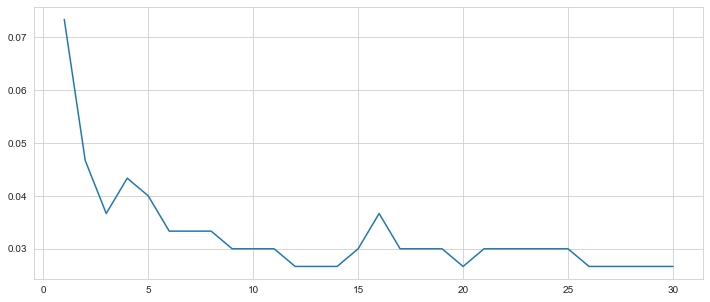

In [101]:
plt.figure(figsize=(12,5))
plt.plot(range(1,31),MSE)

In [102]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [103]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       157
           1       1.00      0.94      0.97       143

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## Great Job!